In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import joblib

In [48]:
import pandas as pd

# Load dataset
df = pd.read_csv("Train.csv")

# Normalize all column names (lowercase, replace spaces with _)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# See final column names
print("Columns after cleaning:", df.columns.tolist())


Columns after cleaning: ['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'product_importance', 'gender', 'discount_offered', 'weight_in_gms', 'reached.on.time_y.n']


In [49]:
import numpy as np

# Keep important features (update according to your dataset)
selected_cols = ["mode_of_shipment", "cost_of_the_product", "discount_offered", "weight_in_gms"]
df = df[selected_cols]

# Generate synthetic delivery_time (in hours)
np.random.seed(42)
df["delivery_time_hours"] = (
    df["cost_of_the_product"] * 0.05 +
    df["discount_offered"] * 0.1 +
    df["weight_in_gms"] * 0.002 +
    np.random.normal(10, 5, size=len(df))   # random noise
).clip(lower=1)   # ✅ fixed here

# Binary column for delay (e.g., > 72 hrs means delayed)
df["delayed"] = (df["delivery_time_hours"] > 72).astype(int)

print(df.head())


  mode_of_shipment  cost_of_the_product  discount_offered  weight_in_gms  \
0           Flight                  177                44           1233   
1           Flight                  216                59           3088   
2           Flight                  183                48           3374   
3           Flight                  176                10           1177   
4           Flight                  184                46           2484   

   delivery_time_hours  delayed  
0            28.199571        0  
1            32.184678        0  
2            33.936443        0  
3            29.769149        0  
4            27.597233        0  


In [54]:
print(df.columns)


Index(['mode_of_shipment', 'cost_of_the_product', 'discount_offered',
       'weight_in_gms', 'delivery_time_hours', 'delayed'],
      dtype='object')


/tmp/ipython-input-1109136371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='delayed', data=df, palette='viridis')


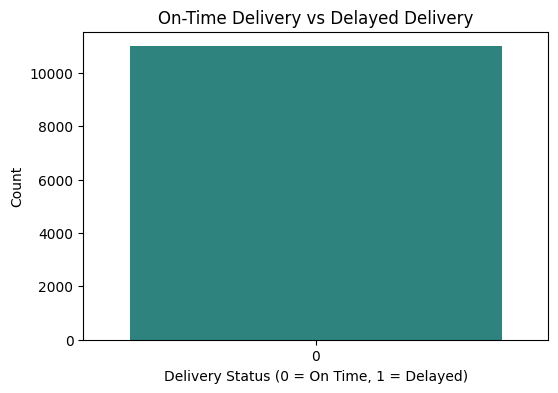

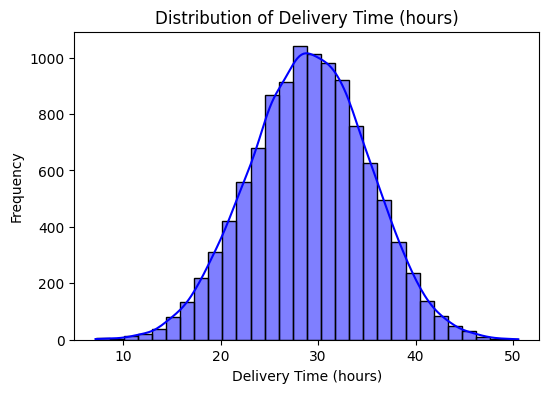

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Countplot: On-Time vs Delayed Deliveries
plt.figure(figsize=(6,4))
sns.countplot(x='delayed', data=df, palette='viridis')
plt.title("On-Time Delivery vs Delayed Delivery")
plt.xlabel("Delivery Status (0 = On Time, 1 = Delayed)")
plt.ylabel("Count")
plt.show()

# 2️⃣ Histogram: Distribution of Delivery Time (hours)
plt.figure(figsize=(6,4))
sns.histplot(df['delivery_time_hours'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Time (hours)")
plt.xlabel("Delivery Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Encode categorical column
le = LabelEncoder()
df["mode_of_shipment"] = le.fit_transform(df["mode_of_shipment"])

# Features/Target
X = df[["mode_of_shipment", "cost_of_the_product", "discount_offered", "weight_in_gms"]]
y = df["delivery_time_hours"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lin_reg = LinearRegression().fit(X_train, y_train)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# Metrics
import numpy as np

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lin))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))



Linear Regression RMSE: 82.71476301090881
Random Forest RMSE: 82.6908543475714
Linear Regression MAE: 3.924034584450272
Random Forest MAE: 4.224727082193538


In [51]:
import pickle

# Choose best model (say Random Forest)
best_model = rf_reg

with open("delivery_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as delivery_model.pkl")


✅ Model saved as delivery_model.pkl
